In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/RSP/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/RSP/rock"
resize_images(image_dir_path)
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

200  images to be resized.
200  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE

image_dir_path = os.getenv("HOME") + "/aiffel/RSP/paper"
resize_images(image_dir_path)


200  images to be resized.
200  images resized.


In [6]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/RSP"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


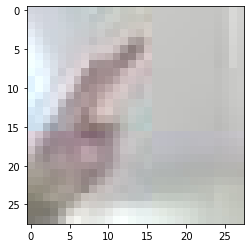

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [9]:
# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)


Epoch 1/10
19/19 [==============================] - 1s 20ms/step - loss: 8.0971 - accuracy: 0.4000
Epoch 2/10
19/19 [==============================] - 0s 19ms/step - loss: 1.0934 - accuracy: 0.6183
Epoch 3/10
19/19 [==============================] - 0s 21ms/step - loss: 0.5596 - accuracy: 0.8133
Epoch 4/10
19/19 [==============================] - 0s 21ms/step - loss: 0.3703 - accuracy: 0.8350
Epoch 5/10
19/19 [==============================] - 0s 20ms/step - loss: 0.2676 - accuracy: 0.8967
Epoch 6/10
19/19 [==============================] - 0s 19ms/step - loss: 0.1722 - accuracy: 0.9300
Epoch 7/10
19/19 [==============================] - 0s 19ms/step - loss: 0.1263 - accuracy: 0.9483
Epoch 8/10
19/19 [==============================] - 0s 21ms/step - loss: 0.0939 - accuracy: 0.9633
Epoch 9/10
19/19 [==============================] - 0s 21ms/step - loss: 0.0905 - accuracy: 0.9667
Epoch 10/10
19/19 [==============================] - 0s 21ms/step - loss: 0.0657 - accuracy: 0.9850


In [11]:
# def resize_images(img_path):
# 	images=glob.glob(img_path + "/*.jpg")  
    
# 	print(len(images), " images to be resized.")

#     # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# 	target_size=(28,28)
# 	for img in images:
# 		old_img=Image.open(img)
# 		new_img=old_img.resize(target_size,Image.ANTIALIAS)
# 		new_img.save(img, "JPEG")
    
# 	print(len(images), " images resized.")
	
# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/scissor"
# resize_images(image_dir_path)

# print("가위 이미지 resize 완료!")

In [12]:
# # 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/rock"
# resize_images(image_dir_path)
# # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# # [[YOUR CODE]]

In [13]:

# image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/paper"
# resize_images(image_dir_path)


In [14]:
image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/RSP1/paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 0 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [15]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 1.0941 - accuracy: 1.0000
test_loss: 1.0940932035446167 
test_accuracy: 1.0


In [ ]:
"""
회고 : 너무 재밌고 유익하겠습니다. 
"""
